#**Anomaly Detection Methods**
This notebook presents DBSCAN clustering algorithm for anomaly detection in the Sales Transactions Weekly Data Set from UCI and then compare and contrast the results with the k-means clustering algorithm.

##Import Libraries

In [32]:
# Importing the necessary libraries for clustering-based anomaly detection analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings

# Additional libraries that might be useful
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

# Setting up visualization styles for better graph representation
sns.set(style="whitegrid")

# Display a message confirming the import
print("Libraries imported successfully.")

Libraries imported successfully.


#Importing Data




In [33]:
data_url = "https://archive.ics.uci.edu/static/public/396/sales+transactions+dataset+weekly.zip"
sales_data = pd.read_csv(data_url)

# To display the first few rows of the dataset
sales_data.head()


,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,MIN,MAX,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,Normalized 10,Normalized 11,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,17,7,11,4,7,8,10,12,3,7,6,5,10,3,21,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,0.44,0.61,0.72,0.33,0.33,0.33,0.61,0.33,0.00,0.50,0.11,0.44,0.22,0.50,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.50,0.17,0.11,0.61,0.39,0.33,0.50,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,3,2,5,2,4,5,1,1,4,5,1,6,0,0,10,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,0.20,0.20,0.60,0.20,0.00,0.60,0.20,0.70,0.70,0.90,0.40,0.70,0.20,0.40,0.50,0.30,0.50,0.80,0.50,0.50,0.30,0.10,0.30,0.20,0.30,1.00,0.50,0.20,0.70,0.30,0.20,0.50,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,9,3,5,6,14,5,5,7,8,14,8,8,7,3,14,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,1.00,0.55,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.00,0.18,0.00,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.00,0.18,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,8,12,6,9,10,3,4,6,8,14,8,7,8,2,19,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,0.35,0.12,0.18,0.12,0.76,0.29,0.53,0.41,0.76,0.12,0.24,0.29,0.53,0.29,0.41,0.24,0.47,0.47,0.00,0.24,0.29,0.00,0.18,0.59,0.18,1.00,0.35,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,5,5,8,7,11,7,12,6,6,5,11,8,9,3,18,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,0.53,1.00,0.33,0.07,0.67,0.33,0.47,0.80,0.20,0.67,0.53,0.20,0.47,0.40,0.33,0.60,0.33,0.40,0.67,0.00,0.13,0.00,0.13,0.13,0.40,0.27,0.07,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


#Descriptive Statistics

In [34]:
# Check column names
column_names = sales_data.columns
print("Column Names:", column_names.tolist())

Column Names: ['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'W19', 'W20', 'W21', 'W22', 'W23', 'W24', 'W25', 'W26', 'W27', 'W28', 'W29', 'W30', 'W31', 'W32', 'W33', 'W34', 'W35', 'W36', 'W37', 'W38', 'W39', 'W40', 'W41', 'W42', 'W43', 'W44', 'W45', 'W46', 'W47', 'W48', 'W49', 'W50', 'W51', 'MIN', 'MAX', 'Normalized 0', 'Normalized 1', 'Normalized 2', 'Normalized 3', 'Normalized 4', 'Normalized 5', 'Normalized 6', 'Normalized 7', 'Normalized 8', 'Normalized 9', 'Normalized 10', 'Normalized 11', 'Normalized 12', 'Normalized 13', 'Normalized 14', 'Normalized 15', 'Normalized 16', 'Normalized 17', 'Normalized 18', 'Normalized 19', 'Normalized 20', 'Normalized 21', 'Normalized 22', 'Normalized 23', 'Normalized 24', 'Normalized 25', 'Normalized 26', 'Normalized 27', 'Normalized 28', 'Normalized 29', 'Normalized 30', 'Normalized 31', 'Normalized 32', 'Normalized 33', 'Normalized 34', 'Normalized 35',

In [35]:
# Check the shape of the data
data_shape = sales_data.shape
print("Data Shape:", data_shape)

Data Shape: (811, 107)


In [36]:
# Get info of the dataset
print("Data Info:")
sales_data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB


In [37]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Descriptive Statistics of the Dataset
data_description = sales_data.describe()
print("Data Description:\n", data_description)

Data Description:
                W0          W1          W2          W3          W4          W5  \
count  811.000000  811.000000  811.000000  811.000000  811.000000  811.000000   
mean     8.902589    9.129470    9.389642    9.717633    9.574599    9.466091   
std     12.067163   12.564766   13.045073   13.553294   13.095765   12.823195   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      3.000000    3.000000    3.000000    4.000000    4.000000    3.000000   
75%     12.000000   12.000000   12.000000   13.000000   13.000000   12.500000   
max     54.000000   53.000000   56.000000   59.000000   61.000000   52.000000   

               W6          W7          W8          W9         W10         W11  \
count  811.000000  811.000000  811.000000  811.000000  811.000000  811.000000   
mean     9.720099    9.585697    9.784217    9.681874    9.790382    9.678175   
std     

In [38]:
# Check for null values in each column
null_values = sales_data.isnull().sum()
print("Null Values in Each Column:\n", null_values)

# To check if there are any null values at all in the dataset
any_nulls = sales_data.isnull().any().any()
print("Are there any null values in the dataset? ", any_nulls)


Null Values in Each Column:
 Product_Code     0
W0               0
W1               0
W2               0
W3               0
                ..
Normalized 47    0
Normalized 48    0
Normalized 49    0
Normalized 50    0
Normalized 51    0
Length: 107, dtype: int64
Are there any null values in the dataset?  False


#Data Preprocessing

In [39]:
# Extracting the sales qty values as the input data
# The product codes are unique and will be used as index
col_num = [0]
col_num.extend(list(np.arange(1,53)))
X = sales_data.iloc[:, col_num].set_index(keys = "Product_Code")

# Display the first few rows of the preprocessed data
X.head()


,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
Product_Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,17,7,11,4,7,8,10,12,3,7,6,5,10
P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,3,2,5,2,4,5,1,1,4,5,1,6,0
P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,9,3,5,6,14,5,5,7,8,14,8,8,7
P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,8,12,6,9,10,3,4,6,8,14,8,7,8
P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,5,5,8,7,11,7,12,6,6,5,11,8,9


In [40]:
# Creating a StandardScaler instance
ssc = StandardScaler()

# Applying Standard Scaler to the data
X_ssc = ssc.fit_transform(X)

# Displaying the first 5 rows of the scaled data for verification
print(X_ssc[:5])


[[ 1.73918665e-01  2.28599692e-01  4.68172354e-02 -1.26809948e-01
   2.61726945e-01  1.97725475e-01  3.20852783e-01  8.75256845e-01
  -2.79445452e-01  3.28879433e-01  8.91436338e-02  3.32460194e-01
   4.62082364e-01 -5.20043333e-02 -6.78180196e-02 -7.61273454e-02
   2.85749851e-01 -6.77627238e-02 -5.17088090e-01  1.79489983e-01
  -3.60148430e-01  1.00605332e-01 -2.23357356e-01  1.69558810e-01
  -4.20338496e-01  1.07160294e-02  5.22293077e-03  2.88622636e-01
  -2.34094520e-01  3.60481532e-01 -5.73818433e-02  2.30115765e-01
   3.96024489e-01 -1.75995592e-01 -2.76632667e-01  5.57486878e-01
   1.81393311e-01  8.53630343e-02  3.32748450e-01  8.40260283e-01
  -1.06801628e-01  2.47839960e-01 -3.87467876e-01 -1.17234293e-01
  -3.86955870e-02  1.26935707e-01  2.82396719e-01 -4.96182276e-01
  -1.49292516e-01 -2.64772723e-01 -3.68282570e-01  1.16306594e-01]
 [-1.57763963e-01 -2.49220798e-01 -4.90114977e-01 -5.69779946e-01
  -1.96719172e-01 -6.60624383e-01 -2.78885868e-01 -5.04995874e-01
  -5.0098

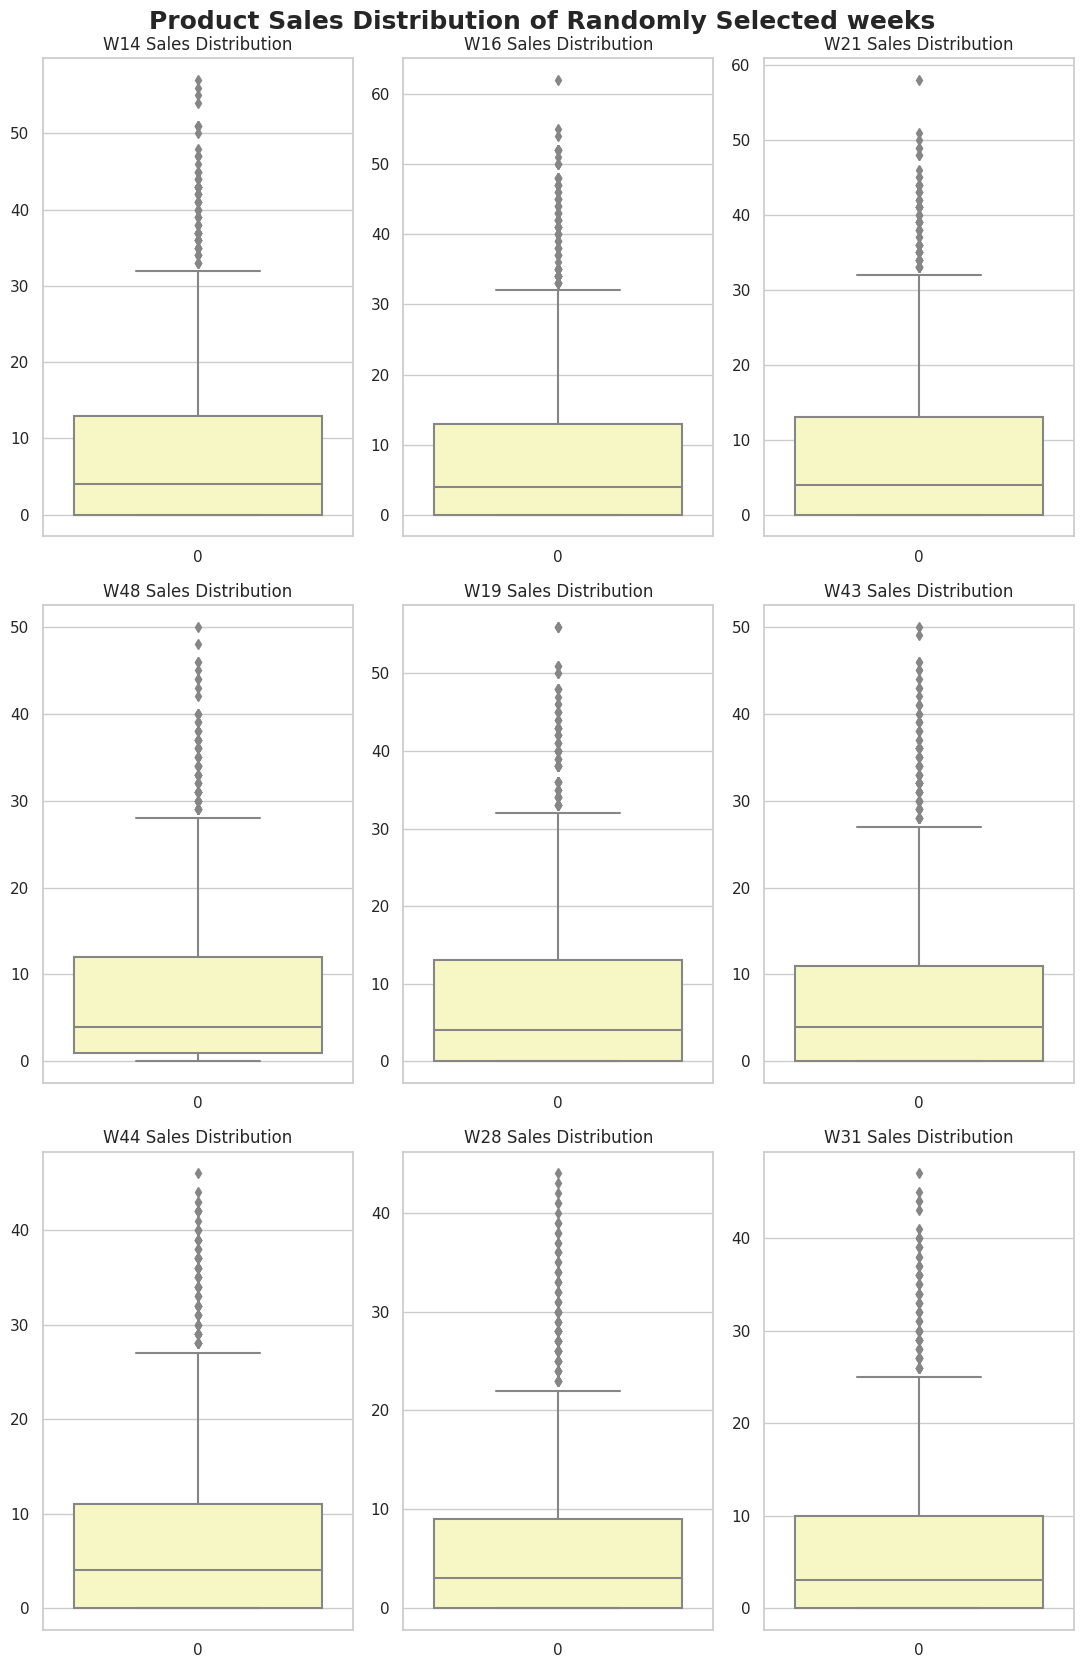

In [41]:
# Randomly selecting some weeks (e.g., 9 weekss)
random_weeks = np.random.choice(X.columns, size=9, replace=False)

# Setting up the plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(11, 17))
fig.suptitle('Product Sales Distribution of Randomly Selected weeks', size=18,
             fontweight='bold')

# Looping over the randomly selected weeks to create boxplots
for i, week in enumerate(random_weeks):
    ax = axes[i//3, i%3]
    sns.boxplot(data=X.loc[: ,week], ax=ax, palette='Spectral')
    ax.set_title(f"{week} Sales Distribution")

plt.tight_layout()
plt.savefig('Box Plot of Product Sales Distribution of Randomly Selected weeks',
            dpi=300)
plt.show()


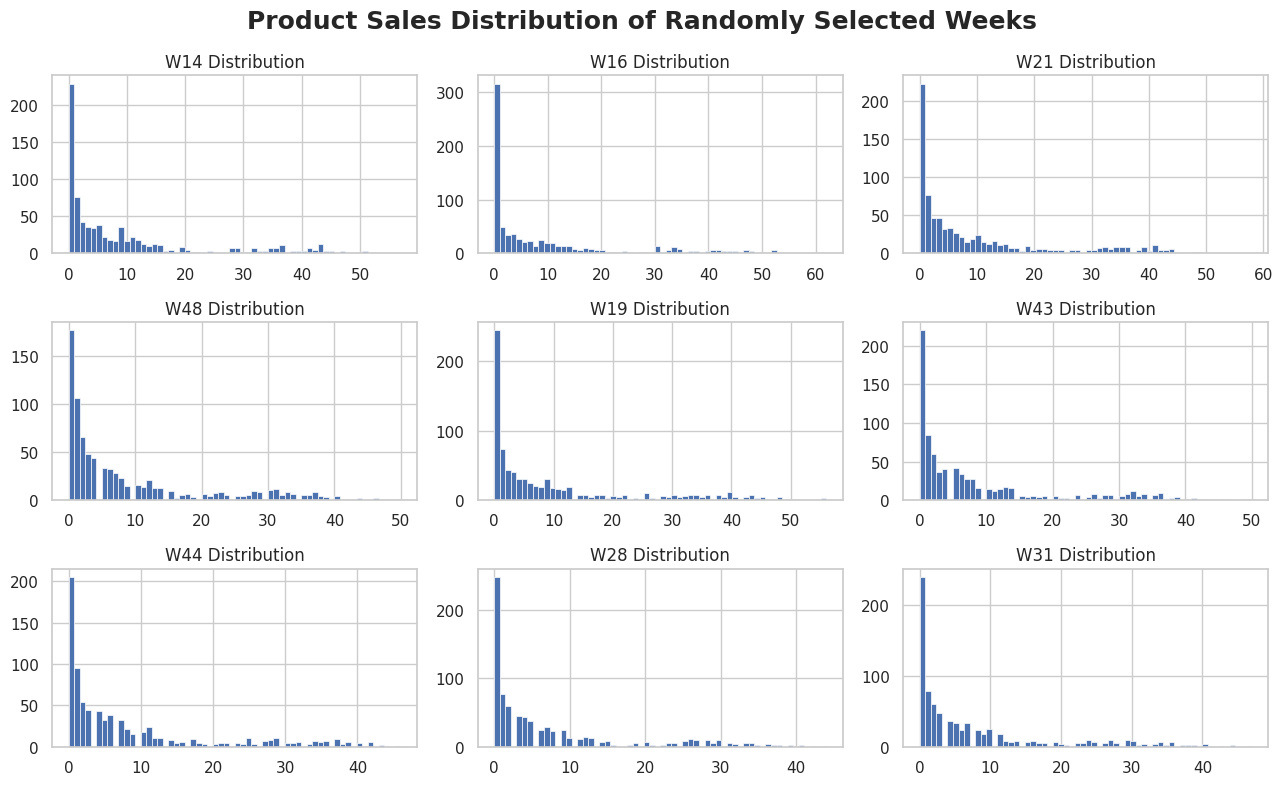

In [42]:
# Setting up the plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
fig.suptitle('Product Sales Distribution of Randomly Selected Weeks', size=18,
             fontweight='bold')

# Looping over the randomly selected weeks to create histograms
for i, week in enumerate(random_weeks):
    ax = axes[i//3, i%3]
    ax.hist(X[week], bins=60, linewidth=0.5, edgecolor="white")
    ax.set_title(f"{week} Distribution")

plt.tight_layout()
plt.savefig('Histogram of Product Sales Distribution of Randomly Selected weeks',
            dpi=300)
plt.show()


#DBSCAN - Density-Based Spatial Clustering of Applications with Noise

DBSCAN is a powerful density-based data clustering algorithm. Clustering is an unsupervised learning technique where we try to group the data points based on specific characteristics. DBSCAN was proposed by Martin Ester et al. in 1996. It works on the assumption that clusters are dense regions in space separated by regions of lower density.

To cluster data points DBSCAN algorithm separates the high-density regions of the data from the low-density areas. It uses distance and a minimum number of points per cluster to classify a point as an outlier. This approch is similar to the K-mean clustering.

PARAMETERS:

**Epsilon** is the radius of the circle to be created around each data point to check the density.

**minPoints** is the minimum number of data points required inside that circle for that data point to be classified as a Core point. This includes the point itself.

In higher dimensions the circle becomes hypersphere, epsilon becomes the radius of that hypersphere, and minPoints is the minimum number of data points required inside that hypersphere.

**DBSCAN algorithm doesn't make assumptions about how data are distributed.**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Code to find the optimal eps value:

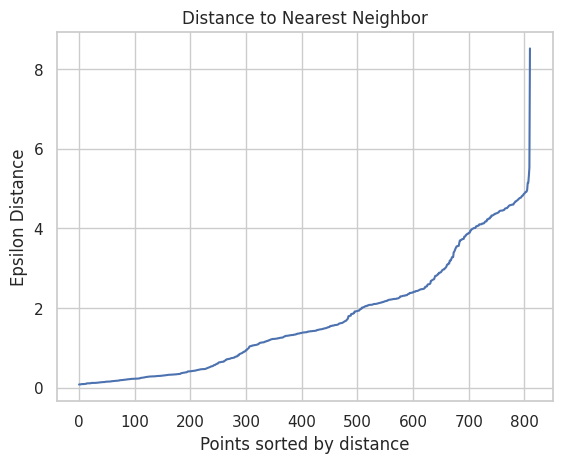

In [43]:
# Step 1: Initialize NearestNeighbors
# This initializes a model to find the nearest two neighbors for each data point.
# 'n_neighbors=2' means the nearest neighbor and the point itself.
neighbors = NearestNeighbors(n_neighbors=2)

# Step 2: Fit the Model
# Fits the NearestNeighbors model on the scaled dataset.
# This calculates the nearest neighbors for each point in X_ssc.
nbrs = neighbors.fit(X_ssc)

# Step 3: Find Distances and Indices of Nearest Neighbors
# Retrieves the distances and indices of the nearest neighbors for each point in the dataset.
distances, indices = nbrs.kneighbors(X_ssc)

# Step 4: Sort Distances
# Sorts the distances in ascending order for each point's nearest neighbors.
# This helps in finding the second smallest distance (excluding the distance to the point itself).
distances = np.sort(distances, axis=0)

# Selects the distances to the second nearest neighbor (first is the point itself).
distances = distances[:, 1]

# Step 5: Plotting
# Plots these distances.
# The 'elbow' in this plot helps to determine a good 'eps' value for DBSCAN.
plt.plot(distances)
plt.title("Distance to Nearest Neighbor")
plt.xlabel("Points sorted by distance")
plt.ylabel("Epsilon Distance")
plt.show()


This plot is used to determine the eps value for DBSCAN. Look for the point of maximum curvature on the plot, commonly referred to as the "elbow," which is a good heuristic for choosing eps. This point indicates a distance where a significant increase in the nearest neighbor distance occurs, suggesting a natural cutoff for the density reach of each point.

In [44]:
# Replace these with estimated values
eps_value = 5 # estimated eps value
min_samples_value = 6 # chosen min_samples value

db = DBSCAN(eps=eps_value, min_samples=min_samples_value).fit(X_ssc)
labels = db.labels_

# Evaluate the result
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('The number of clusters in dataset is:', n_clusters_)

# Displaying the counts of points in each cluster
pd.Series(labels).value_counts()


The number of clusters in dataset is: 2


 0    690
 1    115
-1      6
dtype: int64

###Interpretation:
The presence of 2 clusters suggests that there are two main groups in the dataset based on the features provided and the scaling applied.
The 6 noise points could be outliers or anomalous data points that do not conform to the pattern of either cluster.

###Silhouette Analysis for DBSCAN clustering



In [45]:
def dbscan_silhouette_analysis(X, eps_values, min_samples_values):
    '''Performs silhouette analysis for DBSCAN clustering for every combination of eps and min_samples.

    Parameters:
    X : DataFrame or ndarray - The data to cluster.
    eps_values : list - A list of candidate values for the epsilon parameter in DBSCAN.
    min_samples_values : list - A list of candidate values for the min_samples parameter in DBSCAN.
    '''
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Initialize DBSCAN with specified eps and min_samples values
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            cluster_labels = db.labels_

            # Number of clusters in labels, ignoring noise if present
            n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

            print(" ")
            print("For eps =", eps, "and min_samples =", min_samples,
                  "The number of clusters is:", n_clusters_)

            if n_clusters_ > 1:
                # Calculating the silhouette score
                silhouette_avg = silhouette_score(X, cluster_labels)
                print("For eps =", eps, "and min_samples =", min_samples,
                      "The average silhouette_score is:", silhouette_avg)

                # Creating a scatter plot for the clustered data
                fig, ax = plt.subplots(1)
                # Using a jet colormap for different clusters, noise points will be in black
                colors = cm.jet(np.array(cluster_labels).astype(float))
                scatter = ax.scatter(X[:, 0], X[:, 1], s=30, lw=0, alpha=0.7,
                                     c=colors, edgecolor='k')

                # Plotting noise points in black
                noise_points = X[cluster_labels == -1]
                ax.scatter(noise_points[:, 0], noise_points[:, 1], c='black',
                           marker='x', s=50, label='Noise')
                # Adding cluster labels
                unique_labels = set(cluster_labels) - {-1}
                for label in unique_labels:
                    center = np.mean(X[cluster_labels == label], axis=0)
                    ax.scatter(center[0], center[1], marker='o', c="white",
                               alpha=1, s=200, edgecolor='k')
                    ax.text(center[0], center[1], str(label), color='black',
                            fontweight='bold', ha='center', va='center')


                ax.set_title(f"DBSCAN with eps={eps}, min_samples={min_samples}",
                             fontweight='bold')
                ax.set_xlabel("Feature space for the 1st feature")
                ax.set_ylabel("Feature space for the 2nd feature")
                plt.legend()
                plt.grid(False)
                plt.show()
            else:
                print("For eps =", eps, "and min_samples =", min_samples,
                      "Not enough clusters for silhouette analysis.")
                print(" ")


 
For eps = 3 and min_samples = 5 The number of clusters is: 2
For eps = 3 and min_samples = 5 The average silhouette_score is: 0.4674216301726222


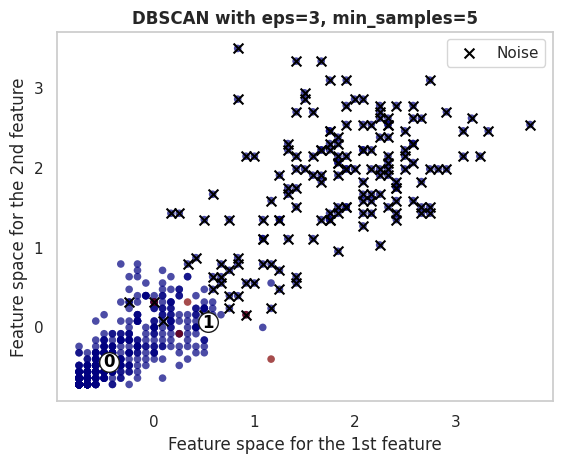

 
For eps = 3 and min_samples = 6 The number of clusters is: 1
For eps = 3 and min_samples = 6 Not enough clusters for silhouette analysis.
 
 
For eps = 3 and min_samples = 7 The number of clusters is: 1
For eps = 3 and min_samples = 7 Not enough clusters for silhouette analysis.
 
 
For eps = 4 and min_samples = 5 The number of clusters is: 2
For eps = 4 and min_samples = 5 The average silhouette_score is: 0.6219150263387101


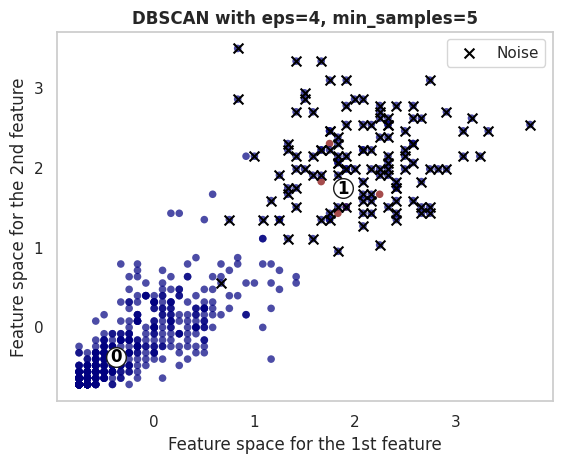

 
For eps = 4 and min_samples = 6 The number of clusters is: 1
For eps = 4 and min_samples = 6 Not enough clusters for silhouette analysis.
 
 
For eps = 4 and min_samples = 7 The number of clusters is: 1
For eps = 4 and min_samples = 7 Not enough clusters for silhouette analysis.
 
 
For eps = 5 and min_samples = 5 The number of clusters is: 2
For eps = 5 and min_samples = 5 The average silhouette_score is: 0.6799149890667479


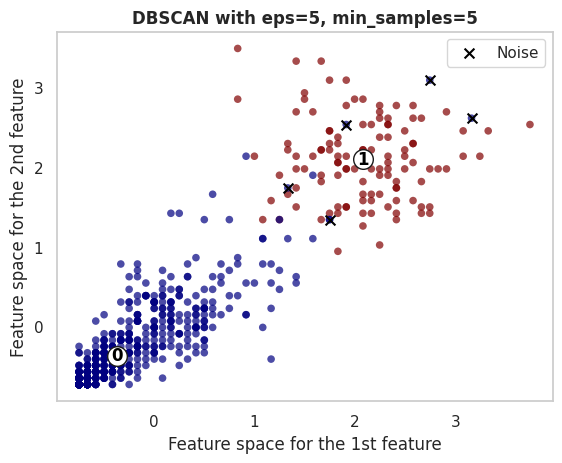

 
For eps = 5 and min_samples = 6 The number of clusters is: 2
For eps = 5 and min_samples = 6 The average silhouette_score is: 0.6802125723720283


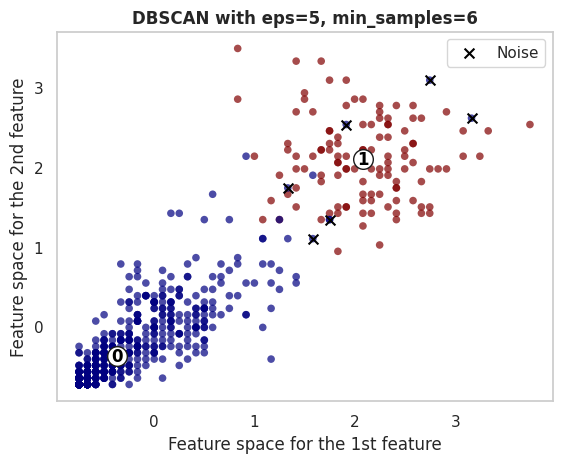

 
For eps = 5 and min_samples = 7 The number of clusters is: 2
For eps = 5 and min_samples = 7 The average silhouette_score is: 0.6802125723720283


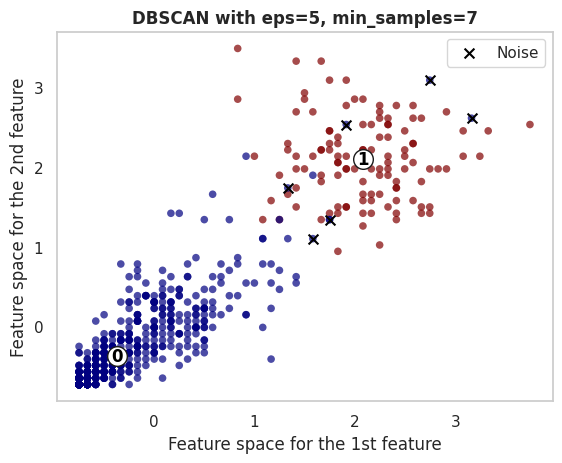

In [46]:
eps_values = [3, 4, 5]  # eps values
min_samples_values = [5, 6, 7]  # min_samples values
dbscan_silhouette_analysis(X_ssc, eps_values, min_samples_values)

From the silhouette analysis, it seems that eps=5 and min_samples=6, 7 gives the best score with 2 clusters.

#K means clustering

We will choose the optimal number of clusters (k value) using both the elbow method and Silhouette analysis.

###Choosing optimal number of clusters using Elbow method

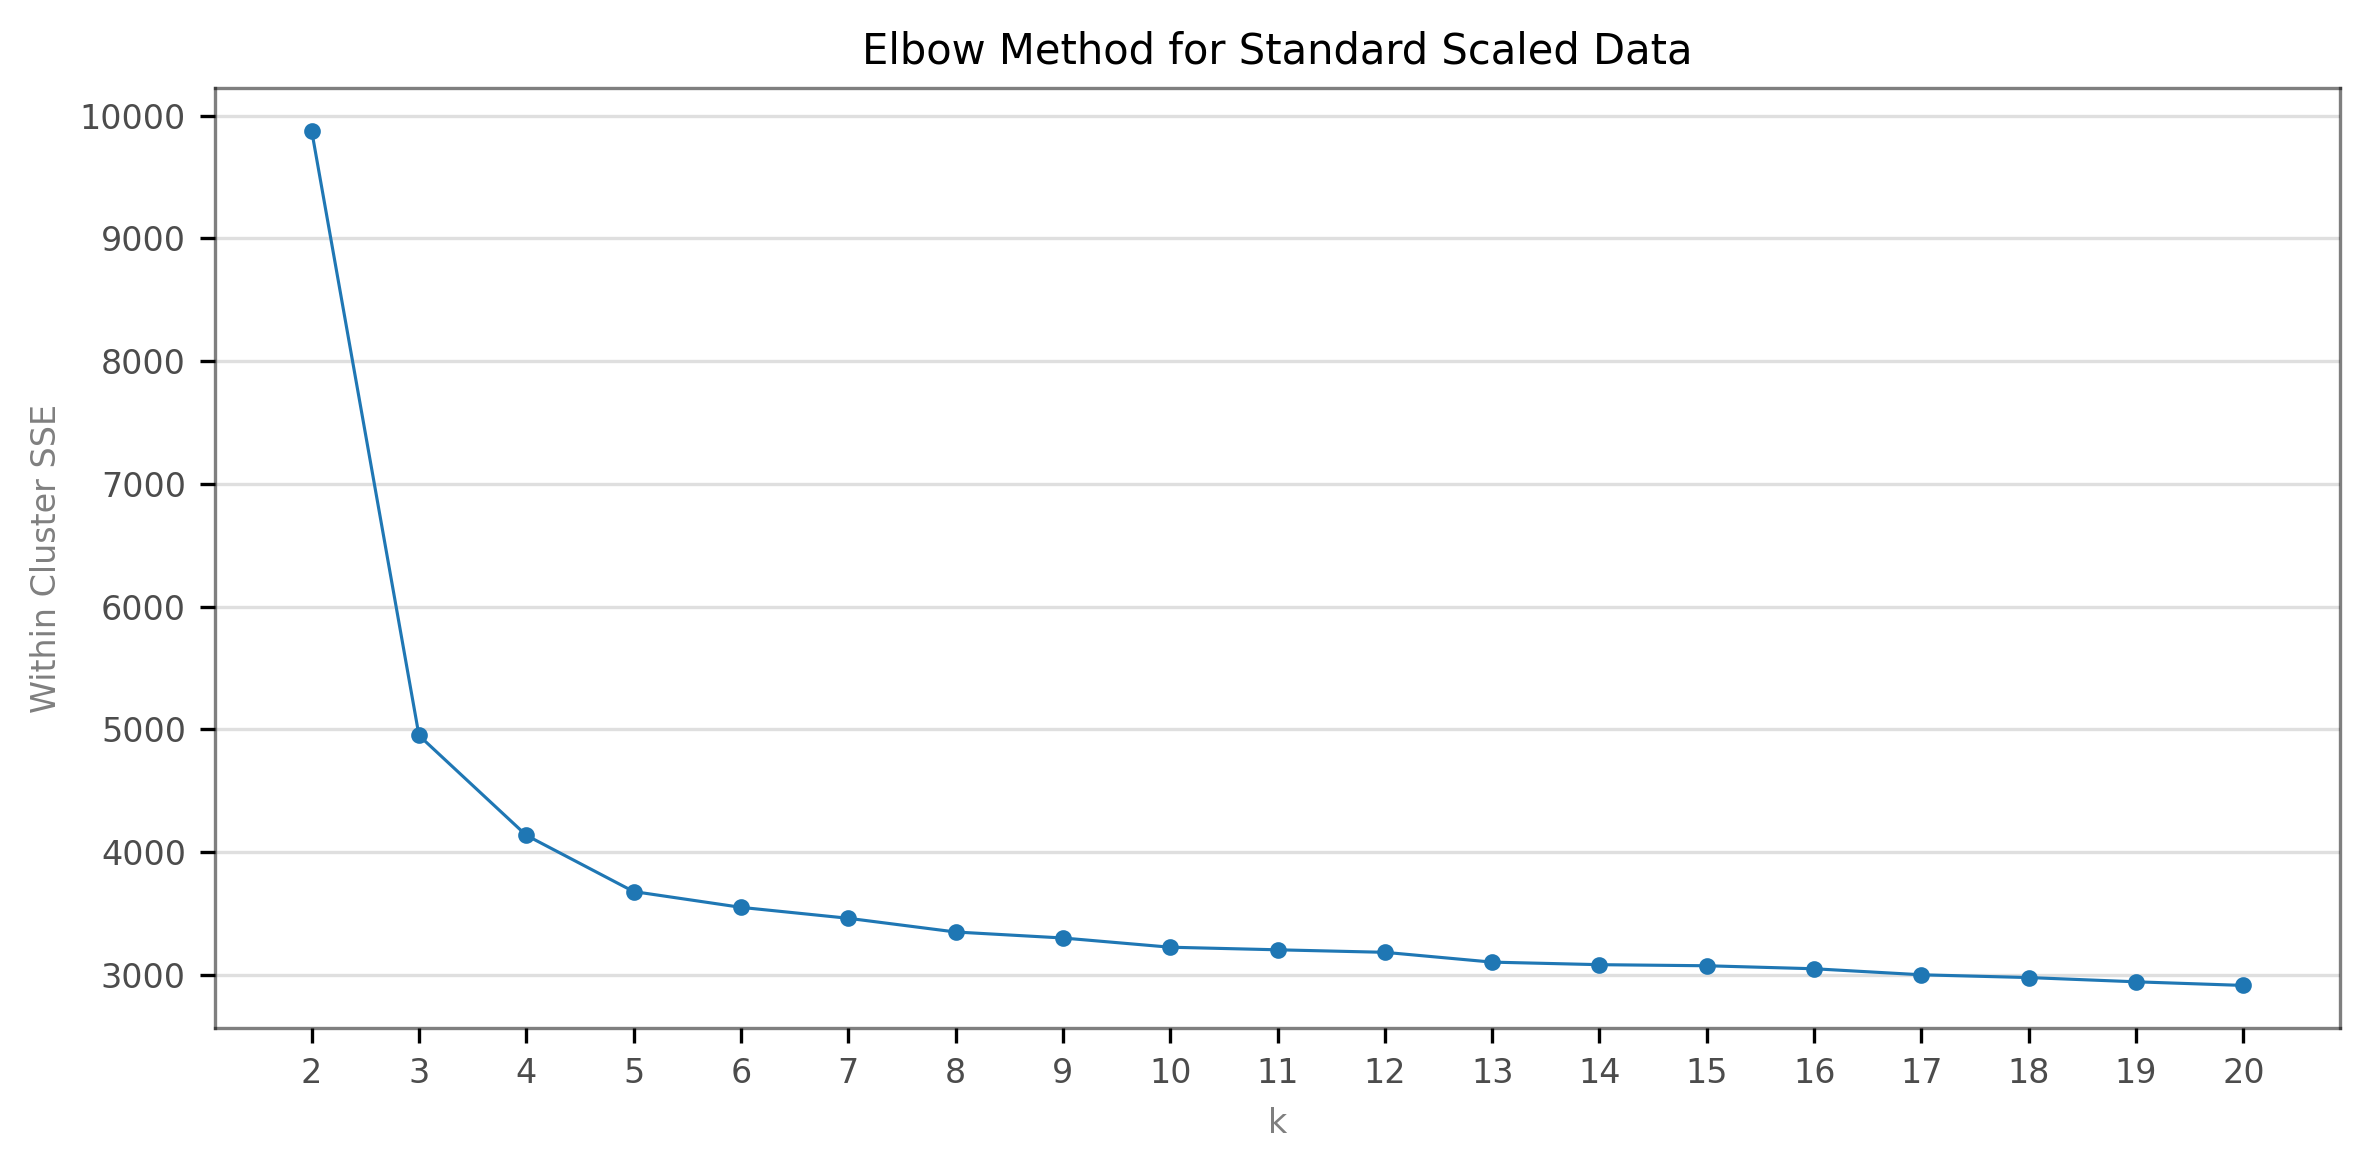

In [47]:
# Style settings for the plot
plt.rcdefaults()
lw = 0.75
marker_size = 3
titlefntsize = 10
labelfntsize = 8
labelalpha = 0.5
ticklabelsize = 8
ticklabelalpha = 0.7
gridalpha = 0.4

# Suppress warnings
warnings.filterwarnings('ignore')

# Function to create an elbow plot
def Elbow_plot(X, ax, ax_title, range_strt, range_end):
    sns.set_style('white')
    k_vals = list(range(range_strt, range_end + 1))
    WCSSE = []

    for k in k_vals:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
        model = kmeans.fit(X)
        WCSSE.append(model.inertia_)

    ax.plot(k_vals, WCSSE, marker='o', markersize=marker_size, linewidth=lw)
    ax.set_title(ax_title, fontsize=titlefntsize)
    ax.set_ylabel('Within Cluster SSE', fontsize=labelfntsize, alpha=labelalpha)
    ax.set_xlabel('k', fontsize=labelfntsize, alpha=labelalpha)

    # Setting x-axis labels as integers
    ax.set_xticks(k_vals)  # Set x-ticks as the k values
    ax.set_xticklabels([str(k) for k in k_vals])  # Set x-tick labels as the k values

    for labels in ax.get_xticklabels() + ax.get_yticklabels():
        labels.set(fontsize=ticklabelsize, alpha=ticklabelalpha)

    ax.yaxis.grid(True, alpha=gridalpha)
    for axspine in ax.spines.values():
        axspine.set(visible=True, alpha=0.5)

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 4), dpi=300)

# Applying the elbow plot function to the standardized data
Elbow_plot(X_ssc, ax=ax, ax_title='Elbow Method for Standard Scaled Data',
           range_strt=2, range_end=20)

plt.tight_layout()
plt.show()


####Observations
From elbow method, 3 seems to be the most optimal value.
However, we cannot rule out 4 and 5. We will proceed with the Silhouette coefficient plot to confirm.

###Silhouette Analysis for k-means clustering

In [48]:
def cluster_evaluation(X, range_n_clusters):
    '''Performs Silhouette Analysis for KMeans clustering.

    Parameters:
    X : DataFrame or ndarray - The data to cluster.
    range_n_clusters : list - A list of candidate values for the number of clusters.
    '''
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    plt.show()


For n_clusters = 3 The average silhouette_score is : 0.6098761362181445
For n_clusters = 4 The average silhouette_score is : 0.5631900067434414
For n_clusters = 5 The average silhouette_score is : 0.4493276110335915


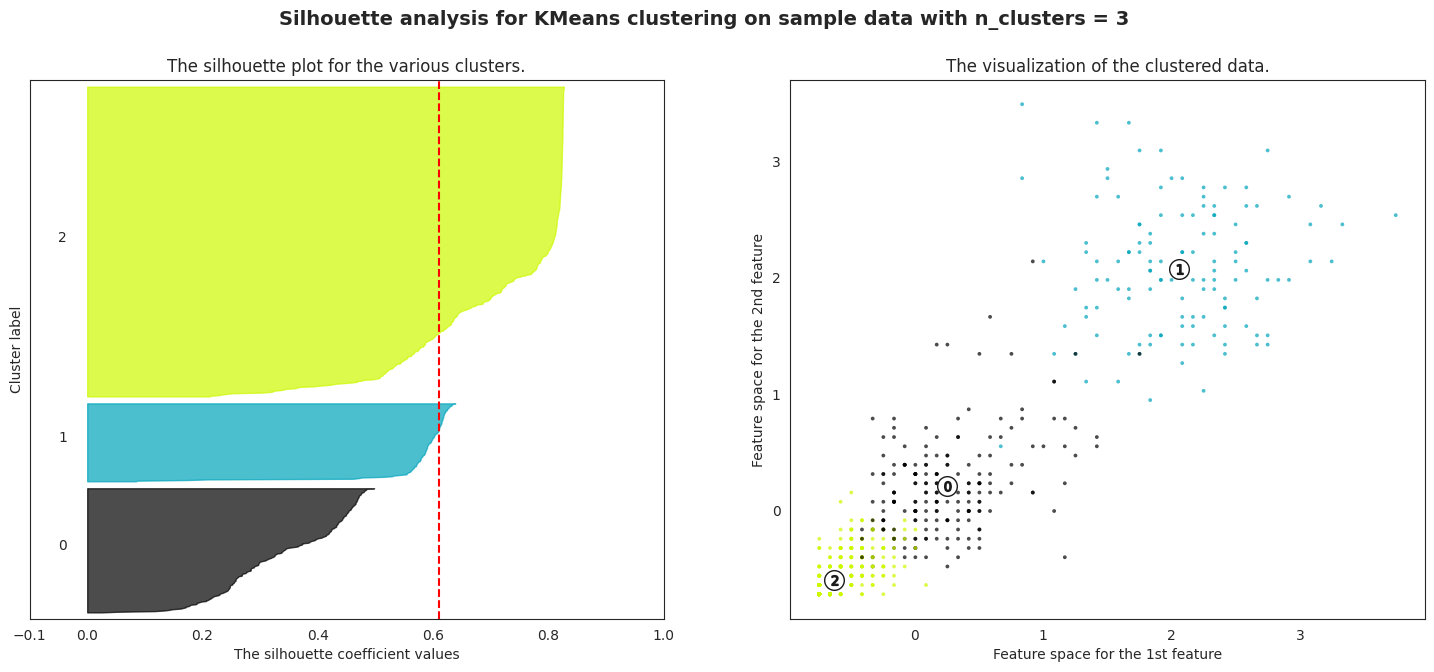

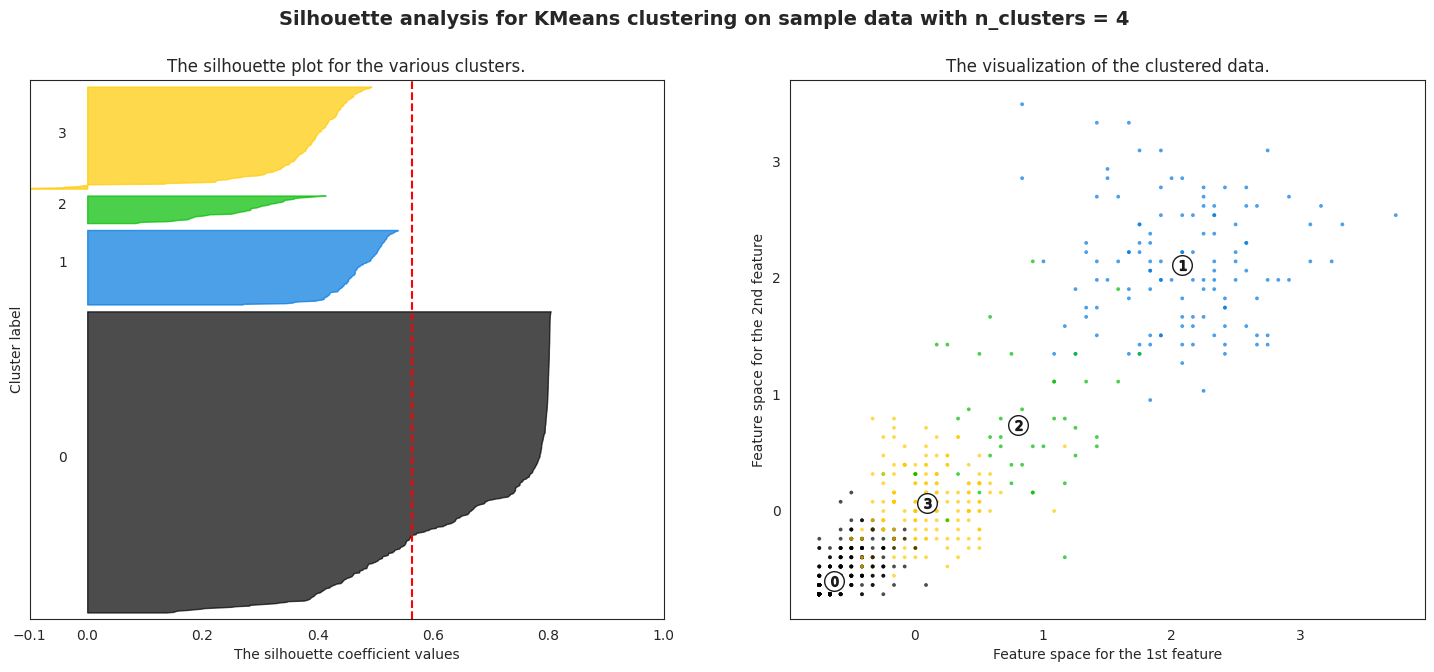

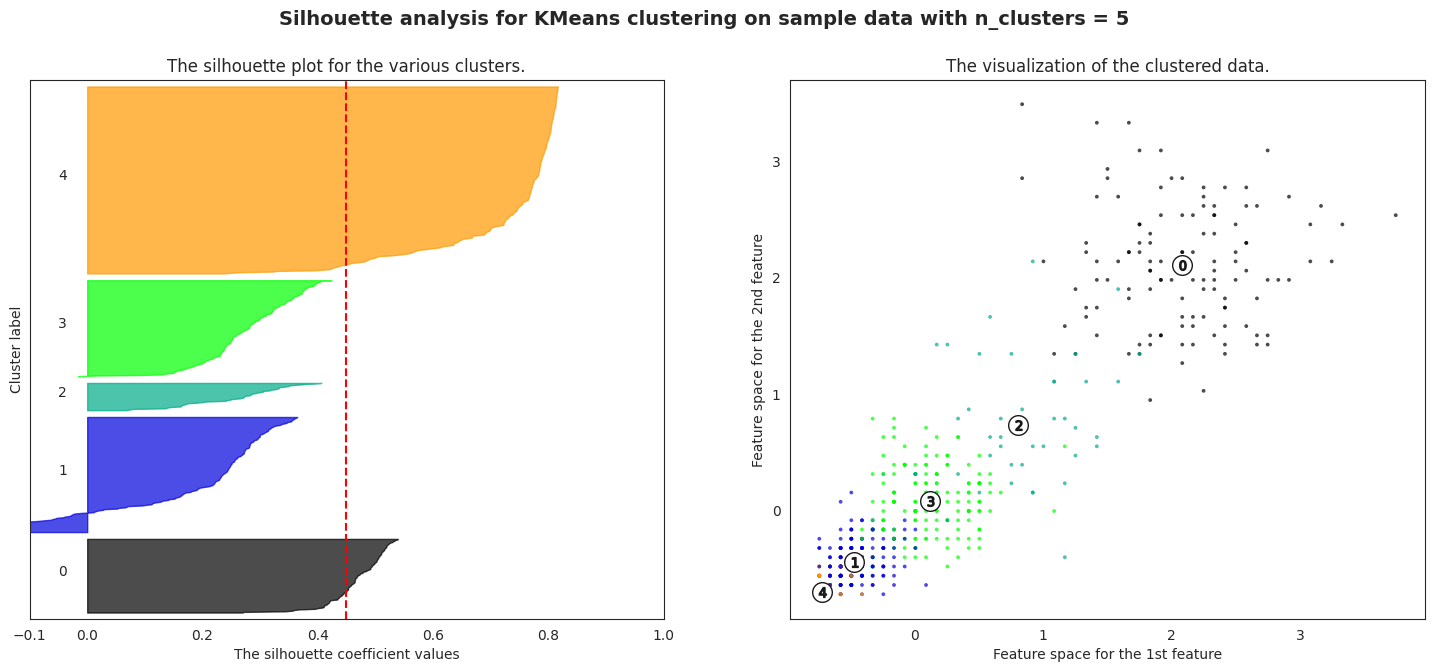

In [49]:
# Range of n_clusters to evaluate
range_n_clusters = [3, 4, 5]

# Calling the function with scaled data
cluster_evaluation(X_ssc, range_n_clusters)

From Silhouette Analysis, the number of clusters can be 3,4,5 in decreasing order of silhouette scores.


###Anomalous Points Detection in Kmeans Cluster

In [50]:
def kmeans_anomaly_detection(X, n_clusters, percentile_threshold=95):
    """
    Performs K-means clustering to detect anomalies in the dataset.

    Parameters:
    X : ndarray - The feature set.
    n_clusters : int - The number of clusters to form.
    percentile_threshold : float - The percentile to use for anomaly thresholding.

    Returns:
    Anomaly detection results and a plot.
    """
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Calculate distances from centroids
    distances = np.linalg.norm(X - centroids[labels], axis=1)

    # Determine threshold for anomalies
    threshold = np.percentile(distances, percentile_threshold)

    # Identify anomalies
    anomalies = distances > threshold

    # Count the number of points in each cluster
    cluster_counts = np.bincount(labels, minlength=n_clusters)

    # Count the number of anomalies
    anomaly_count = np.sum(anomalies)

    # print the number of cluster points and anomalies
    for i in range(n_clusters):
      print(f'Cluster {i} n={cluster_counts[i]}')
    print("Number of anomalies:", anomaly_count)

    # Visualization
    plt.figure(figsize=(10, 6))
    colors = ['green', 'brown', 'cyan', 'red', 'magenta', 'yellow', 'black']  # Extend colors for more clusters

    for i in range(n_clusters):
        plt.scatter(X[labels == i, 0], X[labels == i, 1],
                    label=f'Cluster {i} (n={cluster_counts[i]})',
                    alpha=0.7, c=colors[i % len(colors)])

    plt.scatter(X[anomalies, 0], X[anomalies, 1], c='black', marker='x',
                label=f'Anomalies (n={anomaly_count})')

    plt.title('K-means Clustering with Anomalies', fontweight='bold')
    plt.xlabel('Feature space for the 1st feature')
    plt.ylabel('Feature space for the 2nd feature')
    plt.legend(loc='lower right')
    plt.savefig("K-means Clustering with Anomalies", dpi=300)
    plt.show()


Cluster 0 n=490
Cluster 1 n=124
Cluster 2 n=197
Number of anomalies: 9


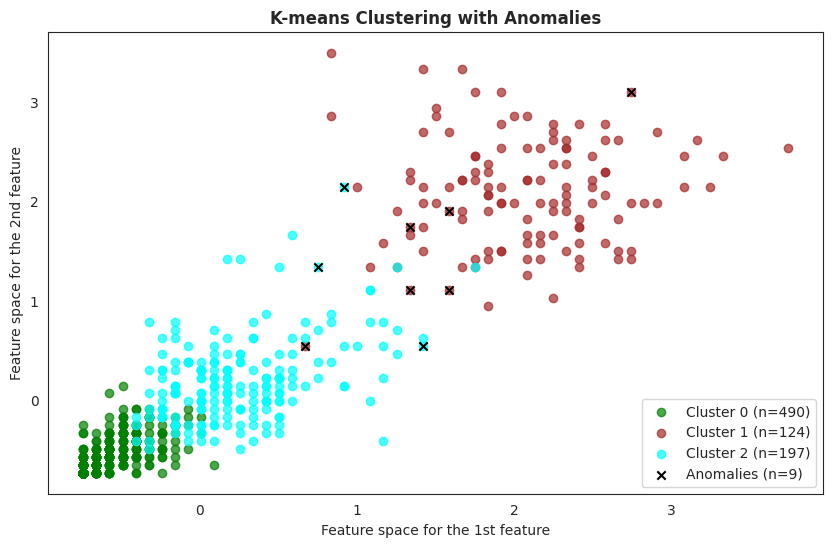

In [51]:
# Calling the kmeans_anomaly_detection function
kmeans_anomaly_detection(X_ssc, n_clusters=3, percentile_threshold=99)


#Visualising the product clusters with the anomalies

###K-means cluster labels

In [52]:
# Setting the optimal number of clusters
optimal_k = 3

# KMeans clustering
clusterer = KMeans(n_clusters=optimal_k, random_state=10)
cluster_labels = clusterer.fit_predict(X_ssc)

# Calculate distances from centroids
centroids = clusterer.cluster_centers_
distances = np.linalg.norm(X_ssc - centroids[cluster_labels], axis=1)

# Determine threshold for anomalies
percentile_threshold = 99
threshold = np.percentile(distances, percentile_threshold)

# Mark points as anomalies (-1) based on the threshold
kmeans_labels = np.where(distances > threshold, -1, cluster_labels)

# Display the first few anomaly labels
print(kmeans_labels[:10])


[0 2 0 0 0 2 2 0 0 0]


###DBSCAN cluster labels

In [53]:
# DBSCAN clustering parameters
eps_value = 5
min_samples_value = 6

# Applying DBSCAN
db = DBSCAN(eps=eps_value, min_samples=min_samples_value).fit(X_ssc)
dbscan_labels = db.labels_

# Display the first few DBSCAN labels
print(dbscan_labels[:10])

[0 0 0 0 0 0 0 0 0 0]


###PCA Transformed Data

In [54]:
# Applying PCA transformation to the data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)  # Ensure that X is your original dataset

# Converting the transformed data into a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'], index=X.index)

# Calculating the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.92274682 0.00833725 0.00282941]


The first three features explained more than 93% of the variance in the data.

In [55]:
# Creating DataFrame for KMeans cluster labels
kmeans_labels_df = pd.DataFrame(kmeans_labels, columns=['kmeans_label'],
                                index=X.index)

# Creating DataFrame for DBSCAN cluster labels
dbscan_labels_df = pd.DataFrame(dbscan_labels, columns=['dbscan_label'],
                                index=X.index)

# Concatenating the PCA transformed data with cluster labels
X_pca_clustered = pd.concat([X_pca_df, kmeans_labels_df, dbscan_labels_df],
                            axis=1)

# Display the new DataFrame
X_pca_clustered

,PCA1,PCA2,PCA3,kmeans_label,dbscan_label
Product_Code,,,,,
P1,5.321035,-8.330358,-2.693458,0,0
P2,-35.764069,-4.442193,-3.039992,2,0
P3,-1.850250,-1.926696,3.020166,0,0
P4,-4.691024,-3.537031,1.825584,0,0
P5,-2.953761,1.357357,-7.256205,0,0
...,...,...,...,...,...
P815,-61.135625,-3.821228,-1.109607,2,0
P816,-45.655741,1.682996,2.756180,2,0
P817,-60.929080,-1.376601,0.244535,2,0


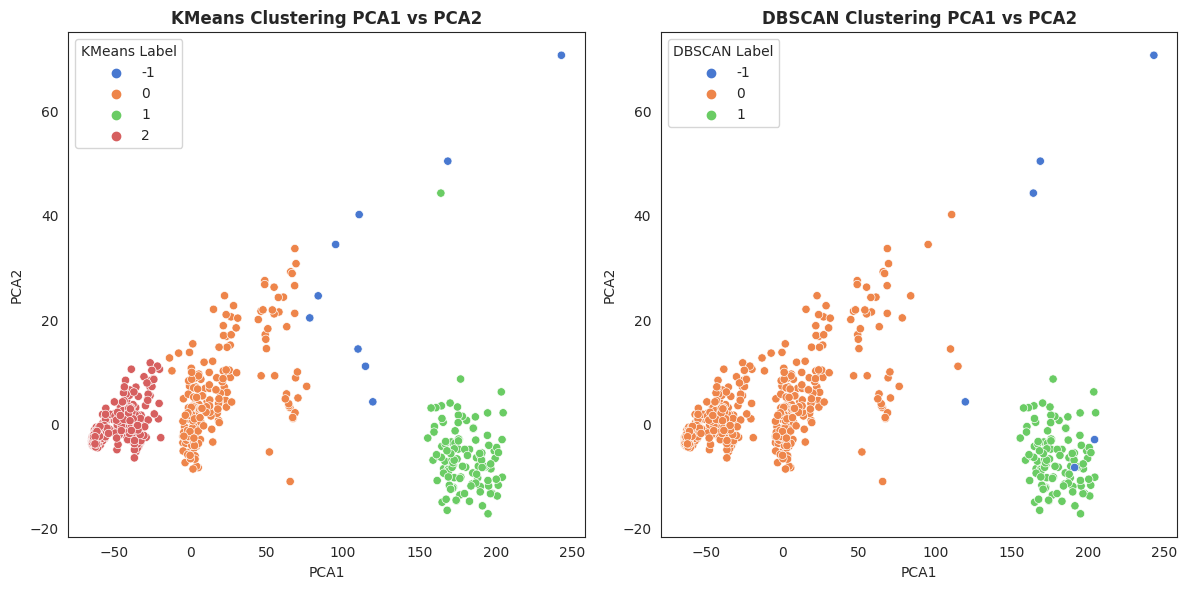

In [56]:
# Creating two subplots: one for KMeans and one for DBSCAN
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for KMeans
sns.scatterplot(x='PCA1', y='PCA2', data=X_pca_clustered, hue='kmeans_label',
                palette='muted', ax=axes[0])
axes[0].set_title('KMeans Clustering PCA1 vs PCA2', fontweight='bold')
axes[0].legend(title='KMeans Label')

# Plot for DBSCAN
sns.scatterplot(x='PCA1', y='PCA2', data=X_pca_clustered, hue='dbscan_label',
                palette='muted', ax=axes[1])
axes[1].set_title('DBSCAN Clustering PCA1 vs PCA2', fontweight='bold')
axes[1].legend(title='DBSCAN Label')

plt.tight_layout()
plt.savefig("PCA Analysis", dpi=300)
plt.show()

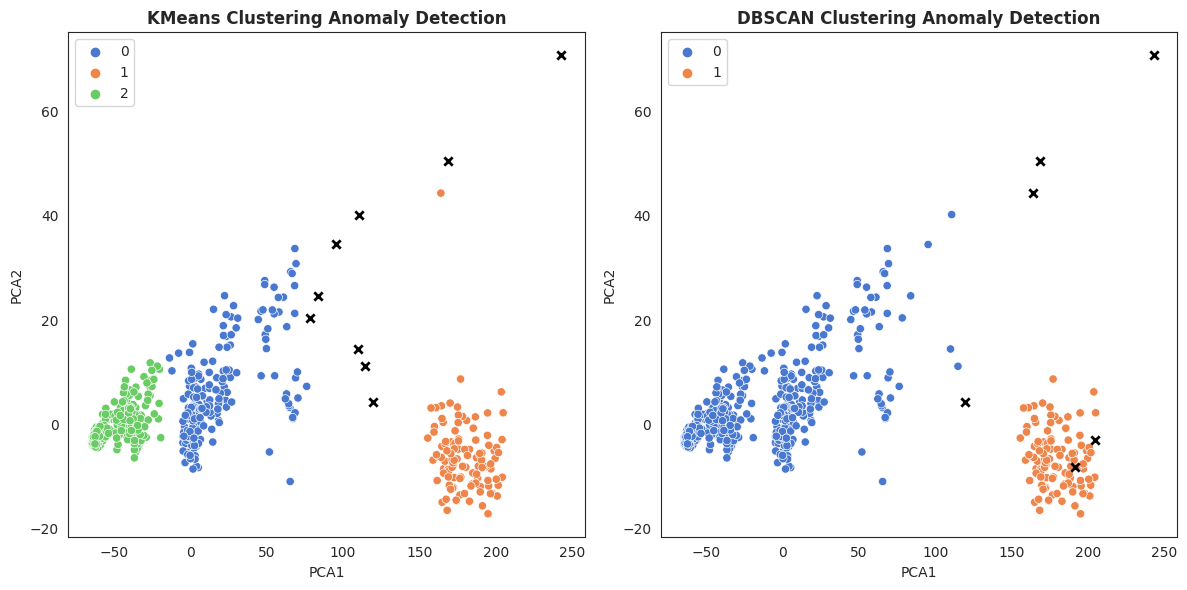

In [57]:
# Creating two subplots: one for KMeans and one for DBSCAN
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for KMeans
# Normal points
sns.scatterplot(x='PCA1', y='PCA2',
                data=X_pca_clustered[X_pca_clustered['kmeans_label'] != -1],
                hue='kmeans_label', palette='muted', ax=axes[0])
# Anomalous points
sns.scatterplot(x='PCA1', y='PCA2',
                data=X_pca_clustered[X_pca_clustered['kmeans_label'] == -1],
                color='black', marker='x', linewidth=2, ax=axes[0])
axes[0].set_title('KMeans Clustering Anomaly Detection', fontweight='bold')

# Plot for DBSCAN
# Normal points
sns.scatterplot(x='PCA1', y='PCA2',
                data=X_pca_clustered[X_pca_clustered['dbscan_label'] != -1],
                hue='dbscan_label', palette='muted', ax=axes[1])
# Anomalous points
sns.scatterplot(x='PCA1', y='PCA2',
                data=X_pca_clustered[X_pca_clustered['dbscan_label'] == -1],
                color='black', marker='x', linewidth=2, ax=axes[1])
axes[1].set_title('DBSCAN Clustering Anomaly Detection', fontweight='bold')

plt.tight_layout()
plt.savefig("PCA with anomalies", dpi=300)
plt.show()


###Trend Visualization for the Anomalous Products

In [58]:
# Anomalous points for KMeans
kmeans_anomalies = X[kmeans_labels == -1]

# Anomalous points for DBSCAN
dbscan_anomalies = X[dbscan_labels == -1]

In [59]:
kmeans_anomalies

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
Product_Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P261,20,36,17,19,16,23,28,19,22,19,21,18,27,24,24,24,26,24,22,20,24,20,20,26,34,30,11,15,16,25,16,17,12,24,20,16,13,18,13,8,16,16,18,12,25,14,22,19,20,18,28,34
P262,25,31,33,23,38,34,31,31,38,34,28,25,29,31,33,53,41,28,36,42,50,33,39,34,63,51,23,25,25,29,20,24,21,27,28,13,17,16,23,38,34,32,33,32,31,28,31,30,29,52,43,43
P270,26,16,23,19,29,21,16,14,29,13,20,22,16,26,19,26,23,17,12,20,24,29,24,38,24,27,10,17,10,16,18,21,14,23,21,15,25,15,13,11,21,19,20,15,17,11,12,18,23,22,19,31
P409,42,48,38,43,35,39,36,38,49,46,44,25,43,38,34,48,52,67,52,45,64,49,48,72,64,64,30,25,43,23,29,30,31,28,34,34,36,47,24,35,47,34,46,41,34,39,44,46,46,41,57,73
P511,25,23,30,33,20,27,31,26,21,42,22,30,33,27,28,32,31,28,25,27,31,19,17,28,33,38,24,25,24,19,22,18,25,16,18,17,23,20,23,24,26,21,22,19,21,19,22,21,25,21,19,28
P533,28,33,21,37,20,28,29,23,27,23,23,24,29,37,41,26,29,22,23,26,35,20,27,19,28,29,24,20,19,15,16,20,23,22,24,15,20,18,24,13,22,23,19,20,24,19,18,22,12,27,29,38
P557,28,23,35,34,33,27,33,27,25,32,40,28,34,24,31,23,27,21,46,29,21,21,27,35,27,24,22,16,19,28,23,14,17,21,16,23,30,20,15,19,20,14,25,18,29,30,30,19,13,25,24,30
P613,18,26,12,17,23,15,18,19,33,31,21,32,21,17,29,20,20,23,20,27,20,30,29,33,43,31,9,17,16,17,14,15,13,8,13,25,16,29,17,17,19,19,24,26,21,25,25,24,29,23,34,30
P615,17,16,19,20,19,19,29,35,15,27,24,24,34,29,24,29,24,29,22,22,37,32,25,27,50,33,14,11,13,24,16,17,15,17,18,20,19,26,16,24,17,20,26,35,29,22,22,30,29,31,34,39


In [60]:
dbscan_anomalies

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
Product_Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P34,47,42,24,55,42,23,41,51,45,29,51,40,28,48,35,40,38,36,53,38,39,41,31,43,33,30,27,37,34,37,38,39,23,33,41,38,28,35,33,33,35,34,29,25,38,46,46,34,34,45,41,26
P134,32,41,50,35,36,35,41,33,32,34,38,29,42,52,57,31,34,24,30,38,42,39,50,30,26,36,37,25,31,22,19,40,43,19,33,38,55,33,43,39,29,45,25,32,37,33,35,31,45,32,27,26
P208,30,26,36,33,33,30,33,28,19,26,43,36,31,33,41,29,33,45,24,32,50,41,50,51,39,49,19,15,27,24,26,22,21,15,23,25,18,33,25,30,27,29,31,37,26,27,39,33,32,36,39,45
P262,25,31,33,23,38,34,31,31,38,34,28,25,29,31,33,53,41,28,36,42,50,33,39,34,63,51,23,25,25,29,20,24,21,27,28,13,17,16,23,38,34,32,33,32,31,28,31,30,29,52,43,43
P409,42,48,38,43,35,39,36,38,49,46,44,25,43,38,34,48,52,67,52,45,64,49,48,72,64,64,30,25,43,23,29,30,31,28,34,34,36,47,24,35,47,34,46,41,34,39,44,46,46,41,57,73
P557,28,23,35,34,33,27,33,27,25,32,40,28,34,24,31,23,27,21,46,29,21,21,27,35,27,24,22,16,19,28,23,14,17,21,16,23,30,20,15,19,20,14,25,18,29,30,30,19,13,25,24,30


In [61]:
# Extracting indices (product codes) of anomalies from both DataFrames
kmeans_anomaly_codes = kmeans_anomalies.index
dbscan_anomaly_codes = dbscan_anomalies.index

# Finding common anomalies
common_anomalies = set(kmeans_anomaly_codes).intersection(set(dbscan_anomaly_codes))

# Display common anomalous product codes
print("Common Anomalous Products:", common_anomalies)

Common Anomalous Products: {'P262', 'P557', 'P409'}


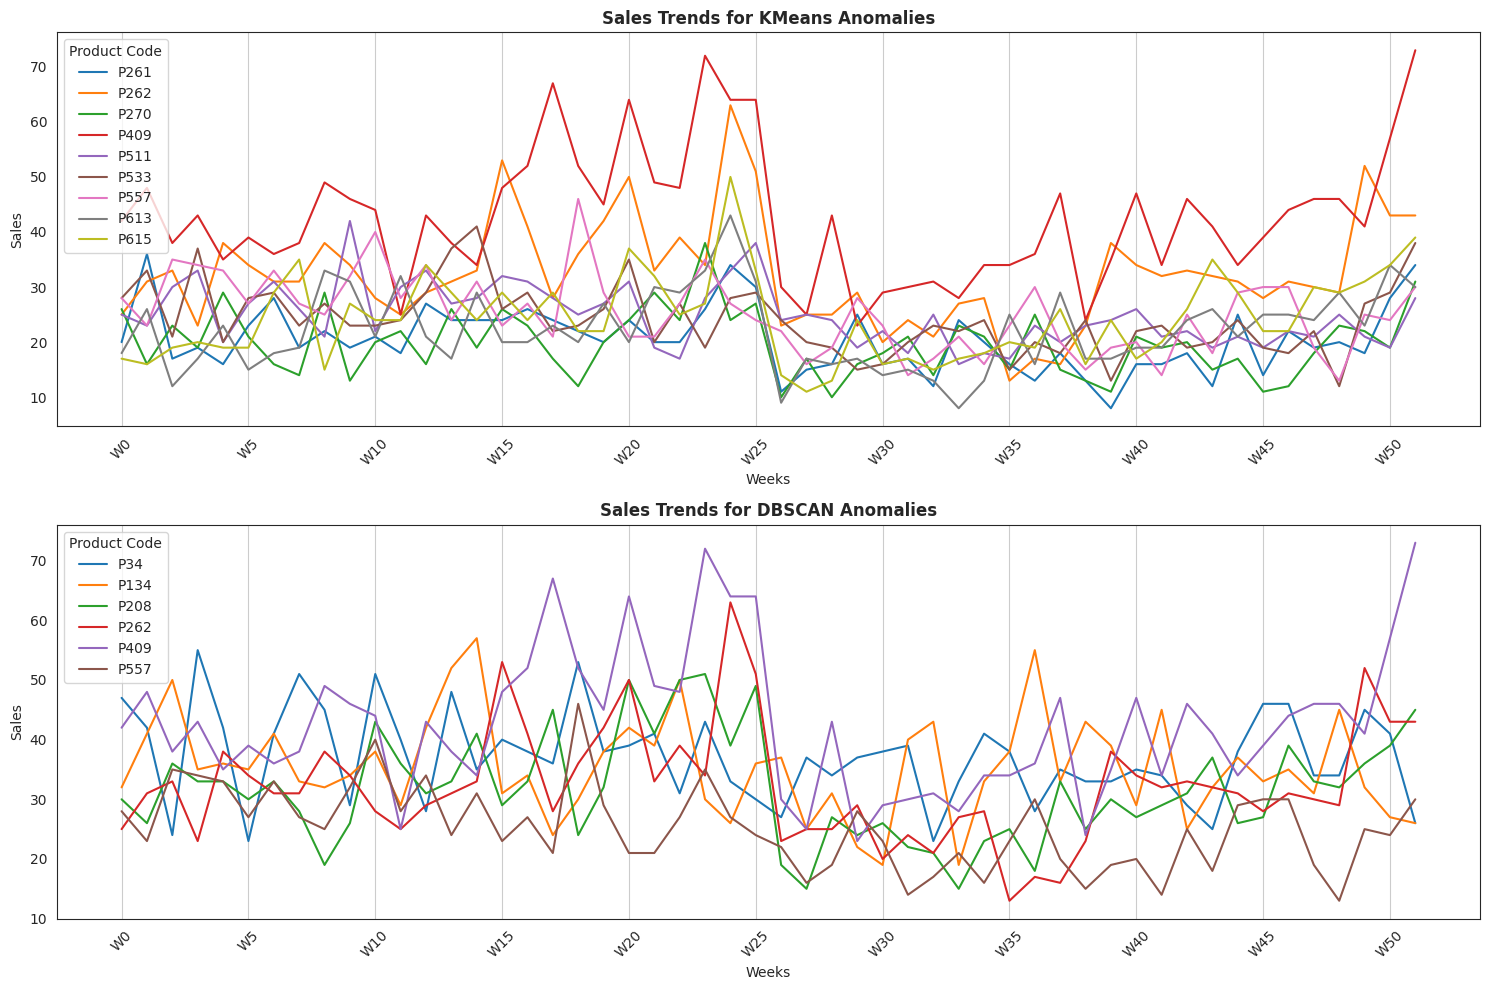

In [62]:
# Creating subplots for the trends in product sales
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plotting trends for KMeans anomalies
for index, row in kmeans_anomalies.iterrows():
    axes[0].plot(row, label=index)
axes[0].set_title('Sales Trends for KMeans Anomalies', fontweight='bold')
axes[0].set_xlabel('Weeks')
axes[0].set_ylabel('Sales')
# Set x-ticks at regular intervals (e.g., every 5 weeks)
axes[0].set_xticks(range(0, len(kmeans_anomalies.columns), 5))
axes[0].set_xticklabels(kmeans_anomalies.columns[::5], rotation=45)  # Rotate for better readability
axes[0].legend(title="Product Code", loc='upper left')
axes[0].grid(True, axis='x')  # Enable gridlines for x-axis

# Plotting trends for DBSCAN anomalies
for index, row in dbscan_anomalies.iterrows():
    axes[1].plot(row, label=index)
axes[1].set_title('Sales Trends for DBSCAN Anomalies', fontweight='bold')
axes[1].set_xlabel('Weeks')
axes[1].set_ylabel('Sales')
# Set x-ticks at regular intervals (e.g., every 5 weeks)
axes[1].set_xticks(range(0, len(dbscan_anomalies.columns), 5))
axes[1].set_xticklabels(dbscan_anomalies.columns[::5], rotation=45)  # Rotate for better readability
axes[1].legend(title="Product Code", loc='upper left')
axes[1].grid(True, axis='x')  # Enable gridlines for x-axis

plt.tight_layout()
plt.savefig("Sales trend for anomalies", dpi=300)
plt.show()


The plot shows the sales trends for products identified as anomalies by KMeans and DBSCAN clustering methods, plotted over weekly sales data. Here are some insights we can draw from the plot:

Volatile Sales Patterns:

The sales patterns of the anomalous products are quite volatile with significant fluctuations. This contrasts with more stable sales trends that might be expected in non-anomalous data.

High Peak Sales:

Certain products show exceptionally high peak sales in certain weeks (e.g., the sharp peaks in both plots). This could indicate seasonal demand, special promotions, or events that caused a temporary surge in sales.

Low Sales Periods:

There are periods where sales drop significantly for some of the products. These troughs could be due to stockouts, decreased demand, or other factors.

Overlap of Anomalies:

Some products, like 'P262', 'P409', and 'P557', are identified as anomalies by both methods, indicating that these products consistently have unusual sales patterns that both clustering approaches can detect.

Unique Anomalies:

Each method has uniquely identified anomalies, suggesting that the criteria for what constitutes an anomaly differ between KMeans and DBSCAN. For example, DBSCAN might be picking up on the local density variations, while KMeans is sensitive to distance from the cluster center.

Potential for Further Investigation:

The anomalies could be of particular interest for further business analysis. Understanding the reasons behind these sales patterns could lead to improved inventory management, tailored marketing strategies, or other business optimizations.

DBSCAN's Sensitivity to Outliers:

The DBSCAN plot shows fewer products identified as anomalies compared to the KMeans plot. This might suggest that DBSCAN is more conservative in identifying anomalies due to its density-based approach.

In conclusion, the anomalies detected by both clustering methods indicate products with irregular sales patterns. These might be driven by various factors that could be worth investigating further to understand their impact on overall sales performance. Such analysis can help in making more informed business decisions related to marketing, inventory management, and customer engagement strategies.